# Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state = 1234)
X.shape

(100L, 2L)

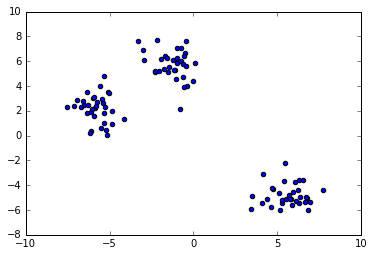

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)

In [6]:
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [7]:
cluster_labels = kmeans.predict(X)

In [8]:
cluster_labels

array([2, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2,
       2, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0,
       0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 1, 2, 2])

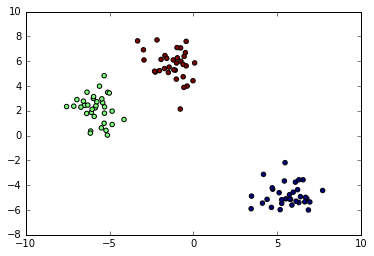

In [9]:
plt.scatter(X[:, 0], X[:, 1], c = cluster_labels)

In [10]:
y

array([1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1,
       1, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2,
       2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 0, 1, 1])

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
accuracy_score(y, cluster_labels)

0.0

In [13]:
confusion_matrix(y, cluster_labels)

array([[ 0, 34,  0],
       [ 0,  0, 33],
       [33,  0,  0]])

In [14]:
from sklearn.metrics import adjusted_rand_score

In [15]:
adjusted_rand_score(y, cluster_labels)

1.0

# Kmeans can generalise, SpectralClustering cannot

KMeans has a `predict` function

In [16]:
X_more = np.random.uniform(X.min(), X.max(), size = (10, 2))
X_more
more_cluster_labels = kmeans.predict(X_more)

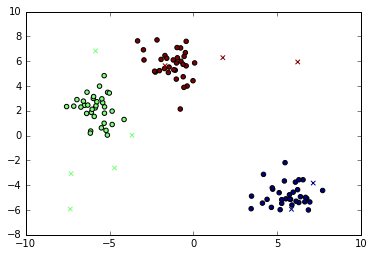

In [17]:
plt.scatter(X[:, 0], X[:, 1], c = cluster_labels)
plt.scatter(X_more[:, 0], X_more[:, 1], marker = "x", c = more_cluster_labels)

In [18]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters = 3, gamma = 0.1)
spectral_clustering.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=0.1, kernel_params=None,
          n_clusters=3, n_init=10, n_neighbors=10, random_state=None)

In [19]:
spectral_clustering.labels_

array([0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2, 0,
       0, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2,
       2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 1, 0, 0])

In [20]:
cluster_labels = spectral_clustering.fit_predict(X)

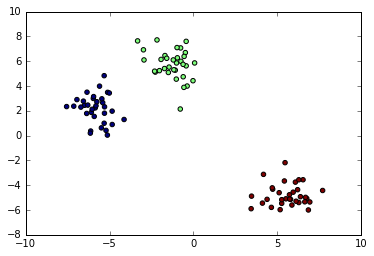

In [21]:
plt.scatter(X[:, 0], X[:, 1], c = cluster_labels)

There is no way to apply `spectral_clustering` to X_more

# An overview of clustering algorithms

![Clustering Algorithms](http://scikit-learn.org/stable/_images/plot_cluster_comparison_0011.png)

# Less trivial example

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

X, y = digits.data, digits.target

In [23]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [24]:
adjusted_rand_score(y, kmeans.predict(X))

0.6665160820124599

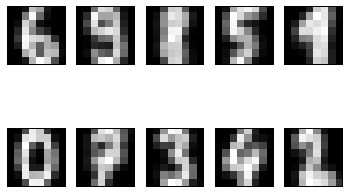

In [26]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap = plt.cm.gray)
    ax.set_yticks(())
    ax.set_xticks(())